## JSON Anotation 값 -> YOLO format 변경

In [1]:
import json
import os 
import cv2
import matplotlib.pyplot as plt

1 0.86484375 0.45 0.2671875 0.5166666666666667
0 0.1609375 0.6041666666666666 0.3125 0.44583333333333336


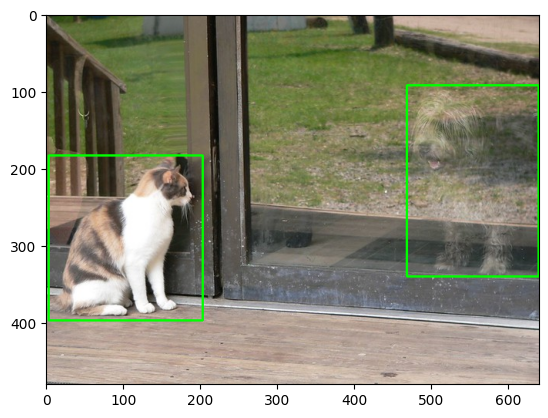

In [2]:
# 1. json 경로 선언
json_path = './data/instances_default.json'

# 2. json 읽기
with open(json_path, 'r', encoding='utf-8') as f :
    json_data = json.load(f)
    
# 3. categories, images, annotations -> COCO dataset 기준
categories_info = json_data['categories']
images_info = json_data['images']
annotations_info = json_data['annotations']

label_dict = {1 : 0, 2 : 1}

for image_json in images_info :
    image_id = image_json['id']
    image_name = image_json['file_name']
    image_width = image_json['width']
    image_height = image_json['height']
    image_path = os.path.join('./data/', image_name)
    
    # image 읽기
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # 5. bbox info 정보 가져오기
    for anno_json in annotations_info :
        if image_id == anno_json['image_id'] :
            bbox = anno_json['bbox']
            
            # float to int
            x = int(bbox[0])
            y = int(bbox[1])
            w = int(bbox[2])
            h = int(bbox[3])
            
            # 6. 라벨 정보 가져오기 
            category_id = anno_json['category_id']
            label_number = label_dict[category_id]
            
            # 7. xywh -> centerX, centerY, w, h 변환하기
            center_x = ((2 * x + w) / (2 * image_width))
            center_y = ((2 * y + h) / (2 * image_height))
            yolo_w = w / image_width
            yolo_h = h / image_height
            
            print(label_number, center_x, center_y, yolo_w, yolo_h)
        
            # yolo 라벨 이름은  ->  이미지에 이름과 동일 해야합니다 
            # aaa.png -> aaa.txt
            # 8. 텍스트 파일 쓰기
            file_name_temp = image_name.replace(".jpg", "")
            
            # 박스 그리기 
            cv2.rectangle(image, (x,y), (x+w, y+h), (0,255,0), 2)
            
        with open(f"./data/{file_name_temp}.txt", 'a') as f :
            f.write(f"{label_number} {center_x} {center_y} {yolo_w} {yolo_h}\n")
            
plt.imshow(image)
plt.show()